In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [41]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

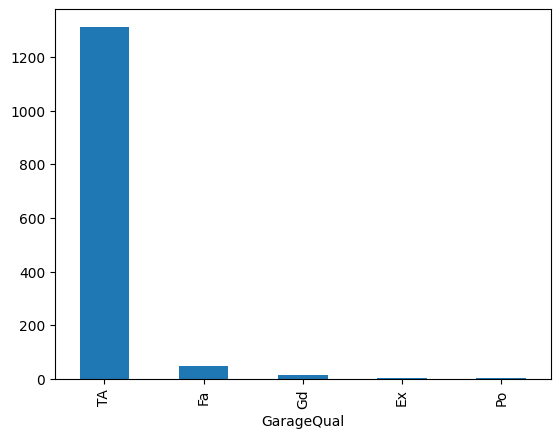

In [5]:
df['GarageQual'].value_counts().plot(kind='bar')

In [43]:
df['GarageQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

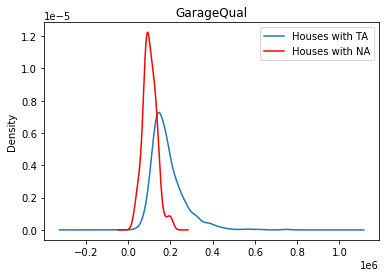

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [45]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [46]:
df['GarageQual'].fillna('TA', inplace=True)

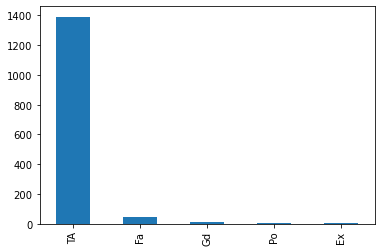

In [47]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

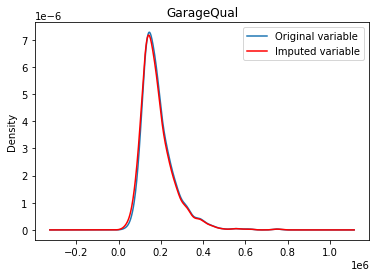

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

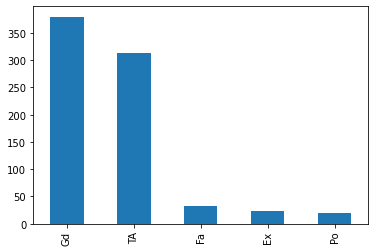

In [49]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [50]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FireplaceQu')

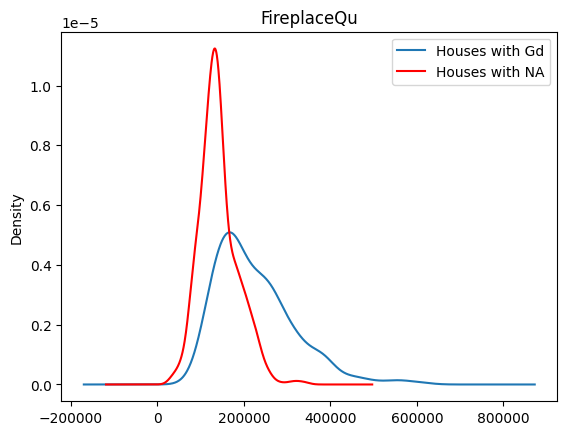

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [7]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [8]:
df['FireplaceQu'].fillna('Gd', inplace=True)

/tmp/ipykernel_7463/3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

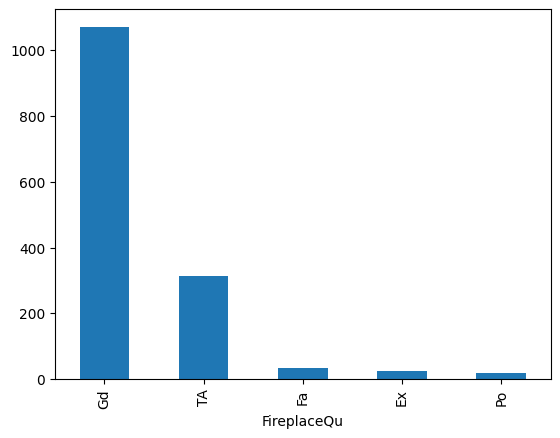

In [9]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

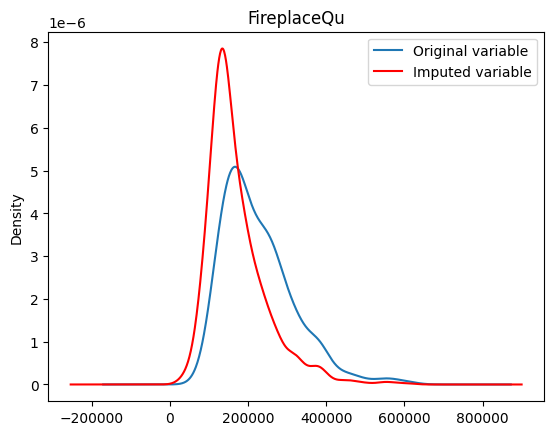

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy='most_frequent')

In [14]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [15]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [18]:
df[df['FireplaceQu']=='Gd']['SalePrice']

0       208500
3       140000
5       143000
6       307000
10      129500
         ...  
1453     84500
1454    185000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1070, dtype: int64